<a href="https://colab.research.google.com/github/safa2hanoon/Multimedia_Task-1_1171123/blob/main/DCT_On_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import functions and libraries**

This section demonstrates the Discrete Cosine Transform of an image. As in the Jpeg standard the DCT is performed block wise. The entire image is partitioned into non-overlapping blocks of size (8x8) pixels. The transformed image is back transformed by applying the Inverse Discrete Cosine Transform (IDCT). The reconstructed image is identical to the original image. Moreover, this Python program allows the user to select an arbitrary block in the image (by clicking into the image). The selected block as well as the DCT of this block are plotted into a Matplotlib figure.

**The following packages are applied by this program:**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_

from scipy import signal
from scipy import misc # pip install Pillow
from scipy import fftpack
import matplotlib.pylab as pylab
import imageio
%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

## **Display Image**

i have read the image using "imageio" library ,which provides an easy interface to read and write a wide range of image data, including animated images, volumetric data.

then returns it at the shape of a numpy array
i used "plt" library here to make matplotlib work like MATLAB , then i displayed a grayscale image using matplotlib.pyplot.imshow().

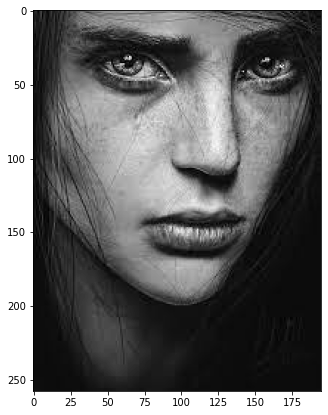

In [4]:
import imageio
im = imageio.imread('my-image.jpg')
im.shape  # im is a numpy array
(512, 512, 3)
f = plt.figure()
plt.imshow(im,cmap='gray')

## **Define 2D DCT and IDCT**

scipy.fftpack.dct -> Return the Discrete Cosine Transform of arbitrary type sequence x 

**Parameters:**
*   The input array.
*   Axis -> int, optional Axis along which the dct is computed; the default is over the last axis (i.e., axis=-1).
*   Norm-> {None, ‘ortho’}, optional Normalization mode. Default is None.

In [5]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

## **Perform a blockwise DCT**

### np.zeros -> Returns a new array of given shape and type, filled with zeros. 
then i did the DCT method by calling the dct2 function for each block in the array , as shown in the matrix 

In [6]:
imsize = im.shape
dct = np.zeros(imsize)

# Do 16*16 DCT on image (in-place)
for i in r_[:imsize[0]:16]:
    for j in r_[:imsize[1]:16]:
        dct[i:(i+16),j:(j+16)] = dct2( im[i:(i+16),j:(j+16)] )
print(dct) 
print(im)       

[[ 5.18187500e+02 -3.34640099e+01  1.48434671e+01 ...  1.50255408e+02
   0.00000000e+00  0.00000000e+00]
 [ 2.86084593e+00  2.48646738e+01 -3.76622884e+00 ... -2.55962720e+01
   0.00000000e+00  0.00000000e+00]
 [ 6.83380962e+00 -1.17107295e+00  1.04303366e+01 ...  3.93178765e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.55264084e-01  3.20364431e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 7.42462120e+01  6.71052610e+00  2.18758517e+00 ...  3.18433667e+01
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[28 47 45 ... 16 16 16]
 [30 42 42 ... 18 18 18]
 [32 35 38 ... 25 25 25]
 ...
 [13 13 13 ... 11 11 11]
 [15 15 15 ... 13 13 13]
 [15 15 15 ... 13 13 13]]


# **Extract 16x16 block and look at its DCT coefficients**

The selected block and its DCT-transform are then plotted into a second Matplotlib-figure:

Text(0.5, 1.0, 'An 16x16 DCT block')

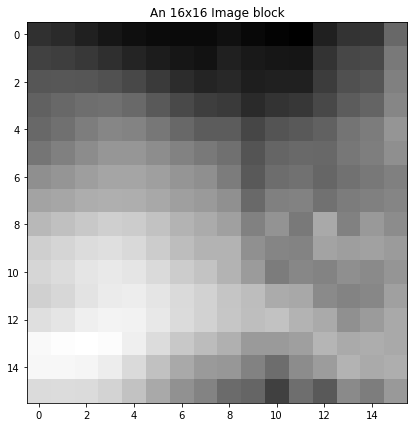

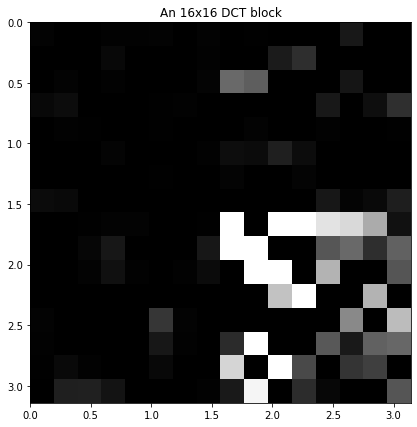

In [7]:
pos = 120
# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+16,pos:pos+16],cmap='gray')
plt.title( "An 16x16 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+16,pos:pos+16],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "An 16x16 DCT block")

## **Display all DCT blocks¶**


Text(0.5, 1.0, '16x16 DCTs of the image')

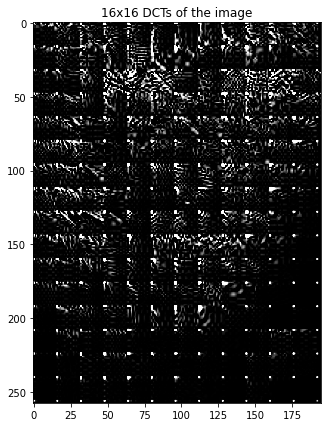

In [8]:
# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "16x16 DCTs of the image")

# **Threshold DCT coefficients , Threshold = 0.012**

### **Keeping only 3.810376% of the DCT coefficients**

Keeping only 3.810376% of the DCT coefficients


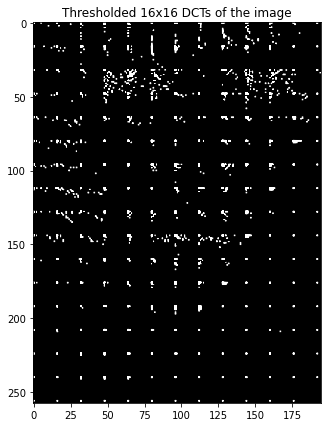

In [9]:
# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 16x16 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

## **Compare DCT compressed image with original, with threshold= 0.012**


Then the IDCT is applied to reconstruct the original image from the transformed representation. The reconstructed image is stored in the variable im_dct

[[28.37727486 48.23681531 25.18822368 ... 21.6875     21.6875
  21.6875    ]
 [28.16647717 48.68160436 24.95759264 ... 21.6875     21.6875
  21.6875    ]
 [27.81365947 49.44697262 24.52650044 ... 21.6875     21.6875
  21.6875    ]
 ...
 [12.25       12.25       12.25       ... 11.         11.
  11.        ]
 [13.125      13.125      13.125      ...  0.          0.
   0.        ]
 [13.125      13.125      13.125      ...  0.          0.
   0.        ]]


Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

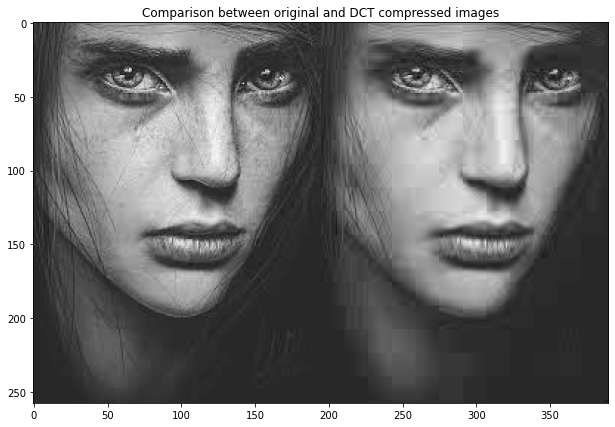

In [10]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:16]:
    for j in r_[:imsize[1]:16]:
        im_dct[i:(i+16),j:(j+16)] = idct2( dct_thresh[i:(i+16),j:(j+16)] )
            
plt.figure()
print(im_dct)
plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )

## **I noticed that the higher the value of k, the less focus on the details of the image, and it is no longer clear, that is, we do not restore it as it was before the compression process.**

# **Threshold DCT coefficients , Threshold = 0.12**

### In this section I increased the value of threshold , and you definitely got a completely blurred image . 
The more we multiply the last DCT-Coefficients by zeros, the less focus is on the details of the image, as the farther right we go from the bottom in the matrix, the more we focus on the details of the image.

Keeping only 0.359769% of the DCT coefficients


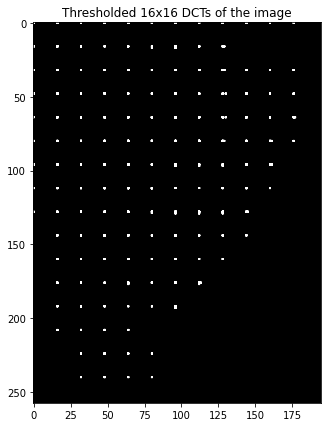

In [11]:
# Threshold
thresh = 0.12
dct_thresh2 = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh2,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 16x16 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh2 != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

## **Compare DCT compressed image with original , when threshold = 0.12**

[[32.38671875 32.38671875 32.38671875 ...  0.          0.
   0.        ]
 [32.38671875 32.38671875 32.38671875 ...  0.          0.
   0.        ]
 [32.38671875 32.38671875 32.38671875 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

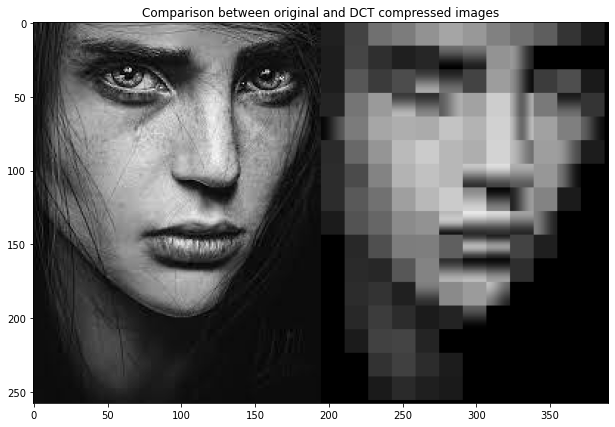

In [12]:
im_dct2 = np.zeros(imsize)

for i in r_[:imsize[0]:16]:
    for j in r_[:imsize[1]:16]:
        im_dct2[i:(i+16),j:(j+16)] = idct2( dct_thresh2[i:(i+16),j:(j+16)] )
            
plt.figure()
print(im_dct2)
plt.imshow( np.hstack( (im, im_dct2) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )


# **Threshold DCT coefficients , Threshold = 0.5**

Keeping only 0.127211% of the DCT coefficients


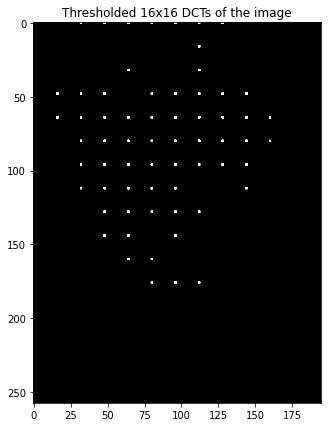

In [13]:
# Threshold
thresh = 0.5
dct_thresh3 = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh3,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 16x16 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh3 != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

# **Compare DCT compressed image with original with threshold=0.5**

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

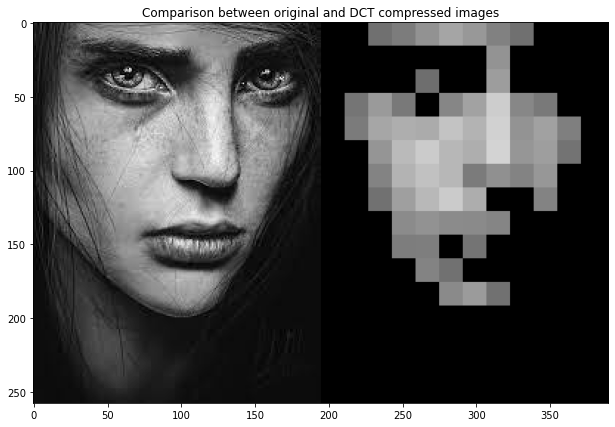

In [14]:
im_dct3 = np.zeros(imsize)

for i in r_[:imsize[0]:16]:
    for j in r_[:imsize[1]:16]:
        im_dct3[i:(i+16),j:(j+16)] = idct2( dct_thresh3[i:(i+16),j:(j+16)] )
            
plt.figure()
print (im_dct3)
plt.imshow( np.hstack( (im, im_dct3) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )

## **Threshold DCT coefficients , Threshold = 0.0012**

Keeping only 33.820314% of the DCT coefficients


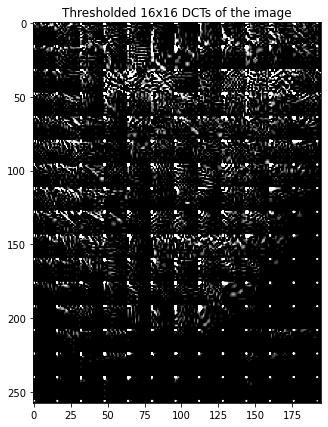

In [15]:
# Threshold
thresh = 0.0012
dct_thresh4 = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh4,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 16x16 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh4 != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

## **Compare DCT compressed image with original with threshold=0.0012**

### Here in this part i have got the best recovery for the image 

[[27.61394741 47.22168313 44.82508055 ... 15.07176067 15.07176067
  15.07176067]
 [29.84266907 41.74837382 42.51273139 ... 17.26814652 17.26814652
  17.26814652]
 [32.57154575 34.71225377 37.91245656 ... 24.51788071 24.51788071
  24.51788071]
 ...
 [12.25       12.25       12.25       ... 11.         11.
  11.        ]
 [14.79455327 14.73039327 14.60453892 ... 13.         13.
  13.        ]
 [14.79455327 14.73039327 14.60453892 ... 13.         13.
  13.        ]]


Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

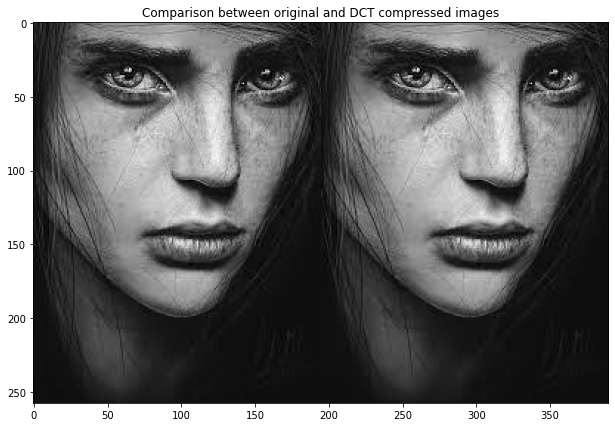

In [16]:
im_dct4 = np.zeros(imsize)

for i in r_[:imsize[0]:16]:
    for j in r_[:imsize[1]:16]:
        im_dct4[i:(i+16),j:(j+16)] = idct2( dct_thresh4[i:(i+16),j:(j+16)] )
            
plt.figure()
print (im_dct4)
plt.imshow( np.hstack( (im, im_dct4) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )